<a href="https://colab.research.google.com/github/raji427/Gender-Prediction-Using-LSTM/blob/main/LSTM_Baby_Names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/NationalNames.csv")

In [3]:
data.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


In [4]:
data.shape

(1825433, 5)

In [5]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [6]:
data['Name'].nunique()

93889

In [7]:
#label encoding for male and female as o,1
data['Gender'] = data['Gender'].astype('category').cat.codes

In [8]:
df = data.groupby('Name').mean()['Gender'].reset_index()
df

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0
...,...,...
93884,Zytavious,1.0
93885,Zyvion,1.0
93886,Zyyanna,0.0
93887,Zyyon,1.0


In [9]:
df['Gender']

,Gender
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
93884,1.0
93885,1.0
93886,0.0
93887,1.0


In [10]:
#for changing float to int
df['Gender'] = df['Gender'].astype('int')
df

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1
...,...,...
93884,Zytavious,1
93885,Zyvion,1
93886,Zyyanna,0
93887,Zyyon,1


#in RNN we use words. but instead of words we use  letters to predict.in names we have 26 alphabets right.so we take 26 inputs.

In [11]:
import string

In [12]:
letters = list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [13]:
vocab = dict(zip(letters,range(1,27)))
vocab

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [14]:
R_vocab = dict(zip(range(1,27),letters))
R_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [15]:
df.shape[0]

93889

In [16]:
df.head()

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [17]:
print(df['Name'].head())
print(type(df['Name'].iloc[0]))

0        Aaban
1        Aabha
2        Aabid
3    Aabriella
4        Aadam
Name: Name, dtype: object
<class 'str'>


In [18]:
def word_num():
  for i in range(0,df.shape[0]):
    seq = [ vocab[letters.lower()] for letters in df['Name'][i]]
    df['Name'][i] = seq

In [19]:
#change the list of names to relative
word_num()

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Name'][i] = seq
/tmp/ipython-input-1001140398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][i] = seq
/tmp/ipython-input-1001140398.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column

In [20]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


In [21]:
x = df['Name'].values
y = df['Gender'].values

In [22]:
name_length = [len(x[i]) for i in df['Name']]

In [23]:
name_length

[5,
 5,
 5,
 9,
 5,
 5,
 7,
 5,
 6,
 6,
 8,
 5,
 7,
 6,
 7,
 4,
 6,
 5,
 5,
 6,
 7,
 5,
 6,
 7,
 7,
 5,
 5,
 7,
 7,
 6,
 6,
 7,
 5,
 5,
 7,
 5,
 4,
 5,
 6,
 5,
 6,
 5,
 8,
 5,
 6,
 6,
 6,
 6,
 5,
 8,
 7,
 5,
 5,
 6,
 6,
 7,
 7,
 5,
 4,
 5,
 8,
 5,
 9,
 7,
 6,
 6,
 7,
 6,
 7,
 7,
 4,
 7,
 8,
 6,
 7,
 6,
 5,
 6,
 7,
 8,
 8,
 7,
 8,
 8,
 5,
 6,
 8,
 7,
 8,
 8,
 8,
 7,
 7,
 6,
 7,
 5,
 6,
 7,
 6,
 8,
 7,
 7,
 6,
 7,
 5,
 7,
 6,
 7,
 7,
 6,
 7,
 7,
 8,
 12,
 11,
 7,
 8,
 7,
 8,
 8,
 7,
 5,
 5,
 5,
 6,
 7,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 6,
 5,
 6,
 8,
 6,
 6,
 6,
 5,
 5,
 5,
 7,
 6,
 7,
 5,
 6,
 7,
 6,
 7,
 5,
 6,
 6,
 5,
 6,
 4,
 6,
 5,
 6,
 7,
 5,
 6,
 7,
 6,
 7,
 6,
 7,
 8,
 5,
 6,
 5,
 5,
 6,
 6,
 5,
 5,
 5,
 4,
 9,
 9,
 8,
 6,
 7,
 8,
 5,
 6,
 9,
 5,
 5,
 6,
 7,
 4,
 5,
 6,
 6,
 7,
 8,
 5,
 5,
 6,
 6,
 5,
 6,
 8,
 5,
 6,
 7,
 5,
 6,
 6,
 7,
 8,
 5,
 6,
 5,
 5,
 6,
 7,
 7,
 8,
 9,
 8,
 9,
 5,
 6,
 4,
 5,
 6,
 7,
 5,
 4,
 5,
 7,
 6,
 7,
 5,
 6,
 7,
 7,
 9,
 9,
 10,
 10,
 9,
 11,
 9,
 11,
 8

In [24]:
import matplotlib.pyplot as plt

(array([  147.,   942.,     0.,  5141., 15774.,     0., 26116., 24397.,
            0., 13500.,  5211.,     0.,  1661.,   573.,     0.,   211.,
          122.,     0.,    61.,    33.]),
 array([ 2.  ,  2.65,  3.3 ,  3.95,  4.6 ,  5.25,  5.9 ,  6.55,  7.2 ,
         7.85,  8.5 ,  9.15,  9.8 , 10.45, 11.1 , 11.75, 12.4 , 13.05,
        13.7 , 14.35, 15.  ]),
 <BarContainer object of 20 artists>)

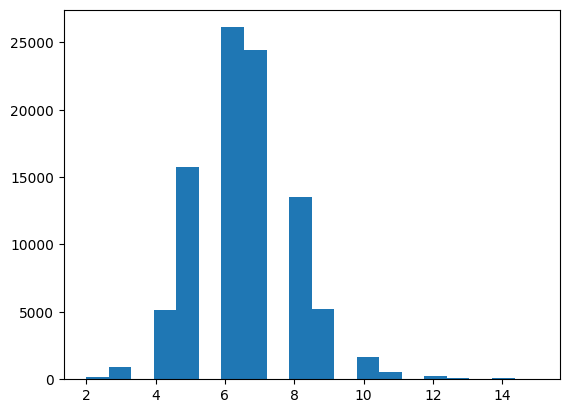

In [25]:
plt.hist(name_length,bins=20)

In [29]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 126.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.4 MB/s eta 0:00:00


In [30]:
from keras.preprocessing.sequence import pad_sequences

In [32]:
x= pad_sequences(df['Name'].values, maxlen=10, padding = 'pre')
x

array([[ 0,  0,  0, ...,  2,  1, 14],
       [ 0,  0,  0, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  2,  9,  4],
       ...,
       [ 0,  0,  0, ..., 14, 14,  1],
       [ 0,  0,  0, ..., 25, 15, 14],
       [ 0,  0,  0, ..., 25, 26, 24]], dtype=int32)

In [36]:
from keras.layers import LSTM, Dense, Input, Embedding
from keras.models import Model

In [41]:
vocab_size = len(vocab)+1#because it also contain 0
vocab_size

27

In [46]:
inp = Input(shape=(10,),sparse = True)#our input contains many zeros so we use sparse tensors
emb = Embedding(input_dim=vocab_size,output_dim=5)(inp)
lstm1 = LSTM(units=32,return_sequences=True)(emb)
lstm2 = LSTM(units=64)(lstm1)
otp = Dense(units=1,activation='sigmoid')(lstm2)
my_model = Model(inputs = inp, outputs = otp)

In [47]:
my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 10, 5)          │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 32)         │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,896 (116.78 KB)

 Trainable params: 29,896 (116.78 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [50]:
his = my_model.fit(x, y, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - acc: 0.6924 - loss: 0.5952 - val_acc: 0.8212 - val_loss: 0.3932
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - acc: 0.8110 - loss: 0.4041 - val_acc: 0.8218 - val_loss: 0.3877
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - acc: 0.8162 - loss: 0.3914 - val_acc: 0.8228 - val_loss: 0.3856
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - acc: 0.8165 - loss: 0.3918 - val_acc: 0.8268 - val_loss: 0.3813
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - acc: 0.8172 - loss: 0.3899 - val_acc: 0.8223 - val_loss: 0.3823
Epoch 6/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - acc: 0.8171 - loss: 0.3850 - val_acc: 0.8291 - val_loss: 0.3748
Epoch 7/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - acc: 0.8230 - loss: 0.3772 - val_acc: 0.8317 - val_loss: 0.3677
Epoch 8/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - acc: 0.8262 - loss: 0.3748 - val_acc: 0.8334 - val_loss: 0.3652
Epoch 9/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/

In [51]:
h = his.history

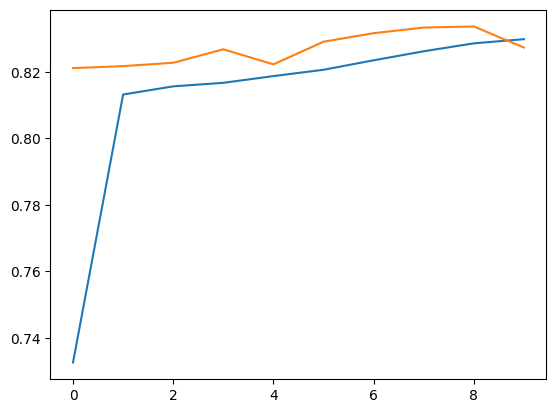

In [52]:
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.show()

In [55]:
#test the model
name = 'Marry'
test_name = name.lower()
seq = [vocab[i] for i in test_name]
x_test = pad_sequences([seq],10)
x_test

array([[ 0,  0,  0,  0,  0, 13,  1, 18, 18, 25]], dtype=int32)

In [56]:
y_pred = my_model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


In [58]:
y_pred

array([[0.2873975]], dtype=float32)

In [60]:
if y_pred < 0.5:
  print("Female")
else:
  print("Male")

Female


In [62]:
def predict_gender(name):
  test_name = name.lower()
  seq = [vocab[i] for i in test_name]
  x_test = pad_sequences([seq],10)
  y_pred = my_model.predict(x_test)
  if y_pred < 0.5:
    return "Female"
  else:
    return "Male"

In [78]:
predict_gender('Devi')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'Female'